<h1> Programming for Physics <br> Lecture 13: Save and Load Data </h1>
<a target="_blank" href="https://colab.research.google.com/github/slxuphys/tamu_phys_150/blob/master/lecture/lecture%2013%20data.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Save your data

While in this course, most of the time we generate data on the fly, in real research, data is often generated by experiments or simulations and saved to files for later analysis and plotting. 

Some simulations and experiments can take hours, days, or even weeks to finish. So it is important to save the data to files for later use.

We can use numpy's `np.save` function to save a single array into a binary npy file.

```python
np.save('filename.npy', array)
```
and you can load the data later using `np.load`.

```python
array = np.load('filename.npy')
```

In [2]:
import numpy as np
test_array = np.array([1,2,3])
np.save('test_array.npy', test_array) #save the array to a file named 'test_array.npy'. check current directory to see the file
loaded_array = np.load('test_array.npy')
print(loaded_array) #load the array from the file and print it out

[1 2 3]


We can use numpy's `np.savez` function to save multiple arrays into a compressed npz file. Let's say you have multiple arrays `array1`, `array2`, etc. You can save them like this:

```python
np.savez('filename.npz', var1=array1, var2=array2, ...)
```

We can then load the data later using `np.load`. `np.load` returns an object similar to a dictionary, where you can access the arrays using the variable names you used when saving the data.

```python
data = np.load('filename.npz')
array1 = data['var1']
array2 = data['var2']
```

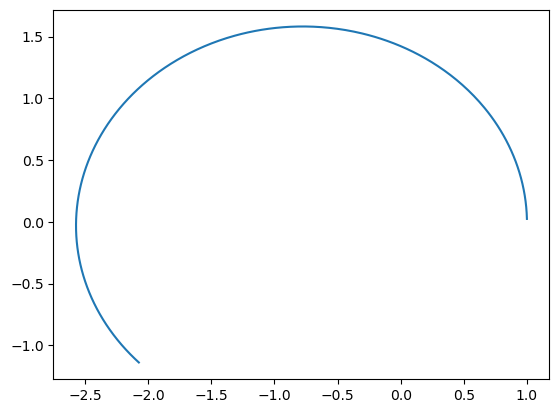

In [6]:
# Save the data to use later
import physics as phy
import numpy as np
ball = phy.Ball(x=(1, 0), v=(0, 1.2))
phy.motion(t_max=10, num_step=500, ball=ball, f_a=lambda x, v: -np.array(x)/np.linalg.norm(x)**3) #simulate the kepler motion, a ball orbiting around the origin under inverse square law force
x_data, y_data = zip(*ball.pos_list)
plt.plot(x_data, y_data)
np.savez('orbit_data.npz', x=x_data, y=y_data) #save x_data and y_data into a compressed npz file in the current directory

Now we can load the data using np.load('filename.npz'). The returned object is similar to a dictionary. We can access the data arrays using the variable names you used when saving the data. For example, to get the x_data and y_data arrays, use data['x'] and data['y'] respectively, where data is the object returned by np.load(). We can then use these arrays to plot the orbit without rerunning the simulation. This works in a different notebook or even on a different computer, as long as we have the data file.

(-2.7508245500400403,
 1.1781916452400019,
 -1.2750141281655323,
 1.7186734372185721)

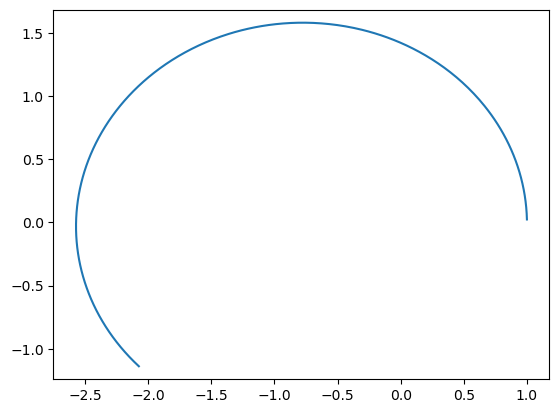

In [5]:
import matplotlib.pyplot as plt
data = np.load('orbit_data.npz') # you can do this in another notebook without rerunning the simulation
plt.plot(data['x'], data['y'])
plt.axis('equal')

You can also use a human readable file formats such as CSV to save your data. 

For example, you can save data to a CSV file using pandas:


In [7]:
import pandas as pd
df = pd.DataFrame({'x': x_data, 'y': y_data})  #create a DataFrame from the data, like a table
df.to_csv('orbit_data.csv', index=False) #save the DataFrame to a CSV file named 'orbit_data.csv' without including the index

You can also load data from a CSV file using pandas:   

(-2.7508245500400403,
 1.1781916452400019,
 -1.2750141281655323,
 1.7186734372185721)

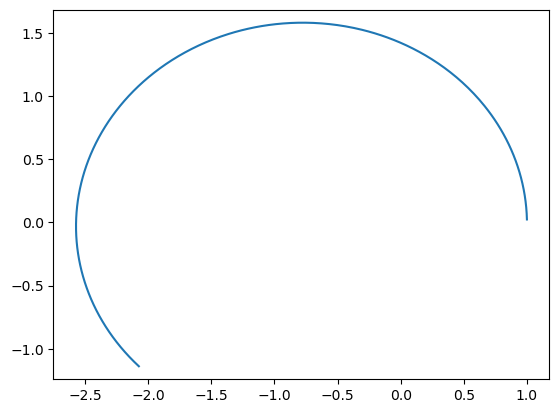

In [8]:
df = pd.read_csv('orbit_data.csv') #load the data from the CSV file into a DataFrame
plt.plot(df['x'], df['y'])
plt.axis('equal')